In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Explorando los datos

In [2]:
dataleft = pd.read_csv('sol6datos.txt', sep=" ", header=None)
dataleft.columns = ['px', 'I']

dataright = pd.read_csv('sol3datos.txt', sep=" ", header=None)
dataright.columns = ['px', 'I']

In [3]:
dataleft.describe()

,px,I
count,1530.00000,1530.000000
mean,764.50000,28756.445098
std,441.81727,4340.198723
min,0.00000,7428.000000
25%,382.25000,27346.500000
50%,764.50000,30406.500000
75%,1146.75000,31502.000000
max,1529.00000,32766.000000


In [4]:
dataright.describe()

,px,I
count,1530.00000,1530.000000
mean,764.50000,29815.594118
std,441.81727,3956.199905
min,0.00000,7449.000000
25%,382.25000,29410.250000
50%,764.50000,31159.500000
75%,1146.75000,31864.500000
max,1529.00000,32766.000000


### Encontrando la linea guia del hidrógeno

La línea $H_\alpha$ del Hidrógeno se encuentra en $\lambda = 6563 Å$  

In [5]:
pos_Halpha1 = dataleft['I'].idxmin()


pos_Halpha2 = dataright['I'].idxmin()
print('Las posiciones de H-Alpha en cada DataFrame izq y derecho son, respectivamente: ', pos_Halpha1, ' y ', pos_Halpha2)

Las posiciones de H-Alpha en cada DataFrame izq y derecho son, respectivamente:  1379  y  181


Ahora se quiere cambiar de un eje x de píxeles a Angstroms.

In [6]:
#SE HACE EL CAMBIO 6563 -> 6563.4

stepsize = 1/30 # Hay 30 px/Angstrom
start1 = 6563.0-(pos_Halpha1*stepsize) 
stop1 = 6563.0 + ((dataleft['px'].size - pos_Halpha1)*stepsize)

start2 = 6562.85 - (pos_Halpha2*stepsize)
stop2 = 6562.85 + ((dataright['px'].size - pos_Halpha2)*stepsize)

start1, stop1, start2, stop2 # Se calculan las longs. de onda para primer y último pixel

(6517.033333333334, 6568.033333333334, 6556.816666666667, 6607.816666666667)

In [7]:
wavelength1 = np.arange(start=start1, stop=stop1, step=stepsize) # Se genera un arreglo de datos con los valores de longs. de onda

wavelength2 = np.arange(start= start2, stop=stop2, step=stepsize)

wavelength1.size, wavelength1[pos_Halpha1], wavelength2.size, wavelength2[pos_Halpha2]

(1530, 6563.000000000586, 1530, 6562.850000000077)

In [8]:
dataleft = dataleft.drop(['wavelength'], axis=1, errors='ignore')

dataleft.insert(column='wavelength', value=wavelength1, loc=2)
dataleft.describe()
#dataleft2 = dataleft[]

,px,I,wavelength
count,1530.00000,1530.000000,1530.000000
mean,764.50000,28756.445098,6542.516667
std,441.81727,4340.198723,14.727242
min,0.00000,7428.000000,6517.033333
25%,382.25000,27346.500000,6529.775000
50%,764.50000,30406.500000,6542.516667
75%,1146.75000,31502.000000,6555.258333
max,1529.00000,32766.000000,6568.000000


In [9]:
dataright = dataright.drop(['wavelength'], axis=1, errors='ignore')


dataright.insert(column='wavelength', value=wavelength2, loc=2)
dataright2 = dataright[dataright["wavelength"] > 6568]
dataright2["I"] = dataright2["I"] - 000
dataright.describe()

C:\Users\alman\AppData\Local\Temp\ipykernel_1368\3495083745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataright2["I"] = dataright2["I"] - 000


,px,I,wavelength
count,1530.00000,1530.000000,1530.000000
mean,764.50000,29815.594118,6582.300000
std,441.81727,3956.199905,14.727242
min,0.00000,7449.000000,6556.816667
25%,382.25000,29410.250000,6569.558333
50%,764.50000,31159.500000,6582.300000
75%,1146.75000,31864.500000,6595.041667
max,1529.00000,32766.000000,6607.783333


In [10]:
fulldata = pd.concat([dataleft, dataright2], axis=0)
fulldata.describe()

,px,I,wavelength
count,2724.000000,2724.000000,2724.000000
mean,838.138767,29668.284875,6562.409361
std,410.674415,3665.213127,26.209405
min,0.000000,7428.000000,6517.033333
25%,508.000000,29060.750000,6539.725000
50%,848.500000,31041.500000,6562.416667
75%,1189.000000,31789.000000,6585.091667
max,1529.000000,32766.000000,6607.783333


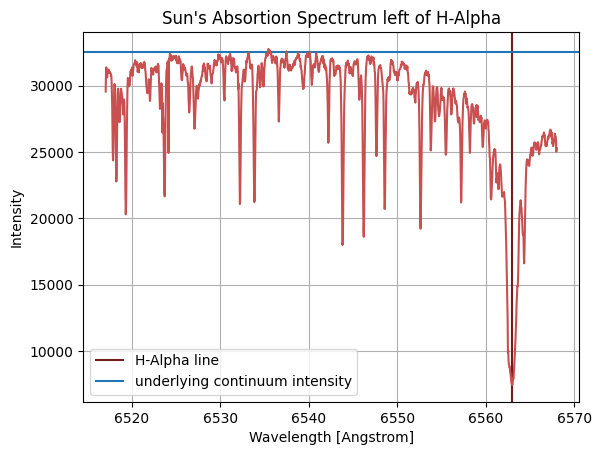

In [11]:
plt.axvline(x = dataleft['wavelength'].loc[pos_Halpha1], color = '#761B1B', label = 'H-Alpha line')
plt.axhline(y = 32500, label = 'underlying continuum intensity')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Intensity')
plt.title('Sun\'s Absortion Spectrum left of H-Alpha')
plt.plot(dataleft['wavelength'], dataleft['I'], color = '#C95050')
plt.grid()
plt.legend()
plt.show()

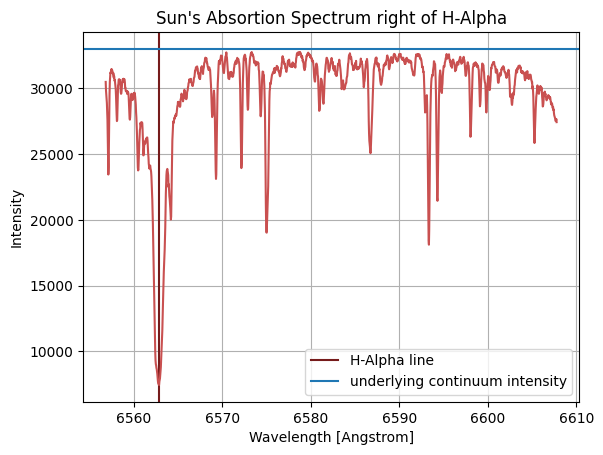

In [12]:
plt.axvline(x = dataright['wavelength'].loc[pos_Halpha2], color = '#761B1B', label = 'H-Alpha line')
plt.axhline(y = 33000, label = 'underlying continuum intensity')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Intensity')
plt.title('Sun\'s Absortion Spectrum right of H-Alpha')
plt.plot(dataright['wavelength'], dataright['I'], color = '#C95050')
plt.grid()
plt.legend()
plt.show()

In [13]:
def plot_spectrum(data, start, finish, hor = None, ver = None):
    """Se define una función para graficar el espectro de absorción, dado un rango de wavelengths.
    El propósito es poder ubicar el rango al que pertenece una línea de absorción
    """
    filtered_data = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]

    plt.xlabel('Wavelength [Angstrom]')
    plt.ylabel('Intensity')
    plt.title('Absorption Spectrum')
    plt.plot(filtered_data['wavelength'], filtered_data['I'])
    if (hor != None):
        plt.axhline(y = hor, color='b', label = 'underlying continuum intensity')
    if (ver != None):
        plt.axvline(x = ver, color = 'r', label = 'Spectral line')
    
    plt.grid()
    plt.show()

### Ahora, se desea hacer el cálculo de W, el equivalent Width.

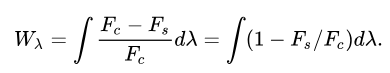

In [14]:
def Calc_eqWidth2(data, start, finish, cIntensity):
    """PASO 1
    Función para calcular el Equivalent Width de acuerdo a la definición de arriba.
    
    data: DataFrame que contiene los datos
    start: Inicio (En Angstroms) del rango de integración
    finish: Fin (En Angstroms) del rango de integración
    cIntensity: Intensidad de fondo
    """
    df = pd.DataFrame()
    df['wavelength'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['wavelength']
    df['I'] = data[(data['wavelength'] >= start) & (data['wavelength'] <= finish)]['I']

    df['Integrand'] = 1 - (df['I'] / cIntensity)

    # Calculate the equivalent width using numerical integration (trapezoidal rule)
    eqWidth = np.trapz(df['Integrand'], df['wavelength'])

    return df, eqWidth

## Checking the transition of Fe I:


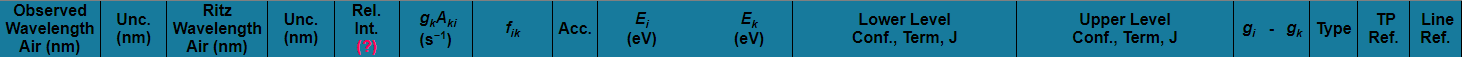


https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=Fe+I&output_type=0&low_w=651.7&upp_w=660.7&unit=1&de=0&plot_out=0&I_scale_type=1&format=0&line_out=0&en_unit=1&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=1&f_out=on&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on&g_out=on&submit=Retrieve+Data

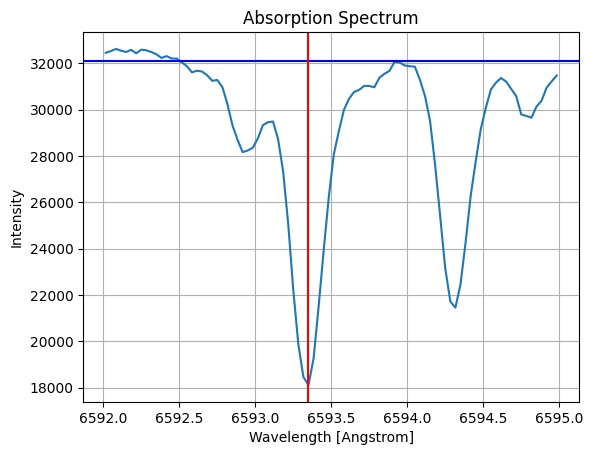

In [38]:
plot_spectrum(dataright, 6592,6595, hor=32100, ver=6593.35
              )


### Step 1: Measuring the equivalent width


In [16]:
_, FeI6593_eqWidth = Calc_eqWidth2(data=dataright, start=6592.75,finish=6593.8, cIntensity=32500)
FeI6593_eqWidth

0.16773487179700755

### Step 2: Computing the vertical position on curve of growth

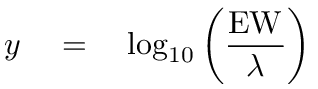

In [17]:
def vertPos_COG(eqWidth, wavelength):
    """PASO 2"""
    return np.log10(eqWidth/wavelength)

y = vertPos_COG(FeI6593_eqWidth, 6593.87)
y

-4.594517019570454

### Step 3: Read the horizontal value from the curve of growth
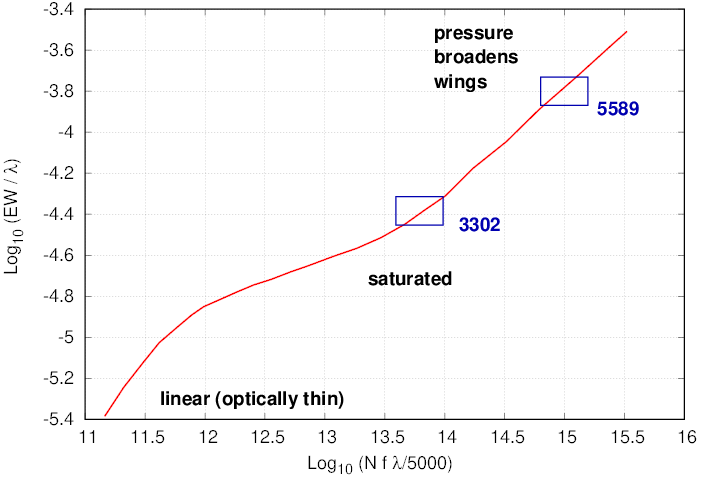

### Step 4: Compute the number of neutral atoms in the lower state

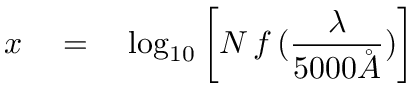

In [18]:
def NAtoms_LowerState(f, wavelength, x):
    """PASO 3"""
    return 10**(x - np.log10(f*(wavelength/5000)))

NFeI_0 = NAtoms_LowerState(f=3.44e-4, wavelength=6593.8, x=13.1)
NFeI_0

2.775081815304146e+16

### Step 5: Compute the number of neutral atoms in ALL states
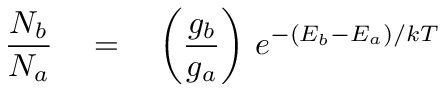

In [19]:
def AtomsRatioStates(gb,ga,Eb,Ea):
    """PASO 4"""
    x = (Eb-Ea)*1.60218e-19
    return (gb/ga) * np.exp(-(x)/(8.00e-20))
FeIStatesRatio = AtomsRatioStates(11,11,4.312,2.432)
FeIStatesRatio

NFeI_1 = NFeI_0*(1+FeIStatesRatio) # Ligera correción
NFeI_1

2.839365927290287e+16

### Step 6: Compute the number of ALL sodium atoms, ionized and neutral

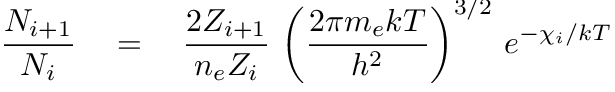

https://www.wolframalpha.com/input?i=%28%282+pi+%28electron+mass%29+%28boltzmann+constant%29+%286530%29%29%2F%28planck+constant%29%5E2%29%5E%283%2F2%29&lang=es

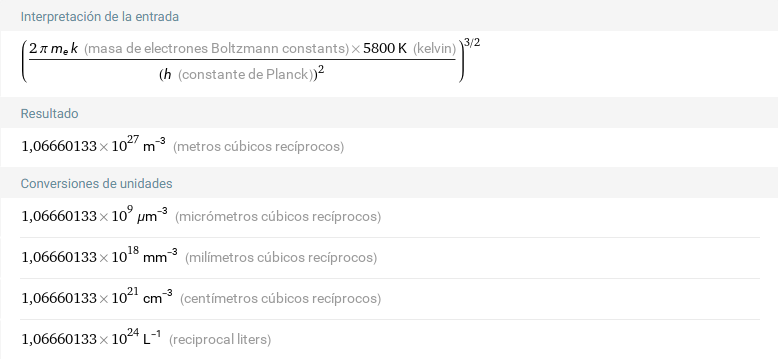

Para encontrar los Zi:

https://physics.nist.gov/PhysRefData/ASD/levels_form.html

Y para los Chi:

https://physics.nist.gov/PhysRefData/Handbook/periodictable.htm

In [59]:
def AtomsRatioIonized(z1,z2,chi):
    a = 1.067e27
    chi = chi * 1.60218e-19
    return (2 * z2)/(1.25e19*z1) * a * np.exp(-chi/8.00e-20)

FeIonizedRatio12 = AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024)

FeIonizedRatio13 = AtomsRatioIonized(z1=46.72, z2=23.06, chi=7.9024)

FeIonizedRatio12

34.57963478961449

In [60]:
NFeI_Total = NFeI_1*(1+FeIonizedRatio12 + FeIonizedRatio13*FeIonizedRatio12)

NFeI_Total

1.2086494894470625e+19

In [61]:
def AtomAbundance(Total):
    return np.log10(Total/6.59e23) + 12

FeAbundance = np.log10(NFeI_Total/6.59e23) + 12
FeAbundance = AtomAbundance(NFeI_Total)
FeAbundance

7.263414958334925

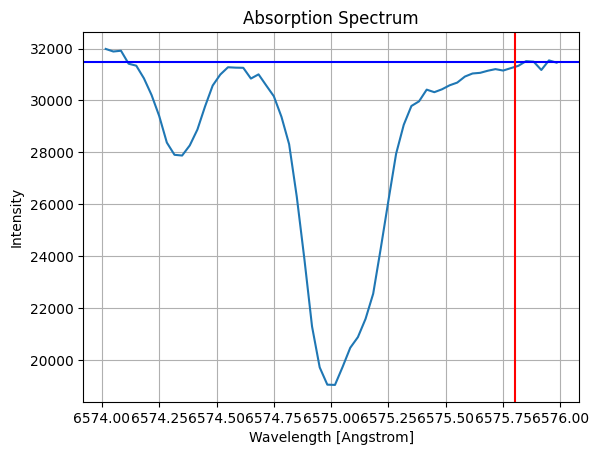

In [23]:
plot_spectrum(dataright, 6574,6576, hor=31500, ver=6575.8
              )

In [99]:
_, FeI6575_eqWidth = Calc_eqWidth2(data=dataright, start=6574.55,finish=6575.8, cIntensity=31500)
print("FeI6575 equivalent width is: ",FeI6575_eqWidth)

y2 = vertPos_COG(FeI6575_eqWidth, 6575)
print("COW Vertical position is: ",y2)

#So, looking at the COW graph, we find:
x = 13.1

NFeI6575_LowerState = NAtoms_LowerState(f=2.79e-04, wavelength=6575, x=13.1)
print("Number of atoms of FeI6575 in Lower State: ", NFeI6575_LowerState)

NFeI6575 = NFeI6575_LowerState*(1 + AtomsRatioStates(7,7,4.4732,2.5891))
print("Number of atoms of FeI6575: ", NFeI6575)

NFe_Total = NFeI6575*(1 + AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) + AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) * AtomsRatioIonized(z1=46.72, z2=23.06, chi=7.9024) )
print("Number of atoms of Fe: ", NFe_Total)

print("Ratios are", AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) , AtomsRatioIonized(z1=30.88, z2=46.72, chi=7.9024) * AtomsRatioIonized(z1=46.72, z2=23.06, chi=7.9024))

FeAbundance = AtomAbundance(NFe_Total)
print("Fe Abundance: ", FeAbundance)


FeI6575 equivalent width is:  0.15959947090150312
COW Vertical position is:  -4.614864309902338
Number of atoms of FeI6575 in Lower State:  3.4313897046599376e+16
Number of atoms of FeI6575:  3.5102270213884124e+16
Number of atoms of Fe:  1.4942188523383781e+19
Ratios are 34.57963478961449 390.0962098876237
Fe Abundance:  7.355528796942958


## Calcio I

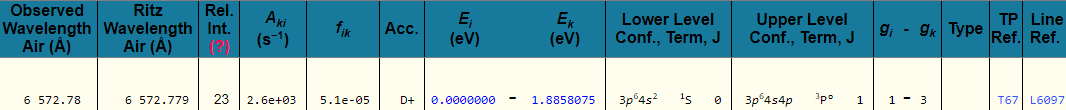

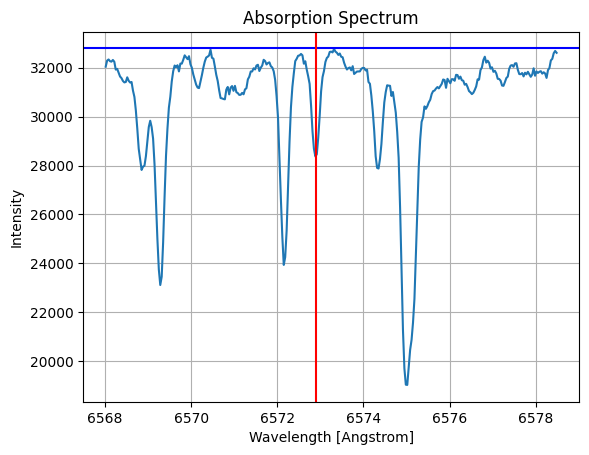

In [46]:
plot_spectrum(dataright, 6568,6578.5, hor=32800, ver=6572.9
              )

In [98]:
# Step 1: Calculate the equilibrium width of CaI (6572.78)
_, CaI6572_eqwidth = Calc_eqWidth2(data=dataright, start= 6572.55, finish=6573.3, cIntensity=32800)
print("CaI6572_eqwidth: ", CaI6572_eqwidth)

# Step 2: Calculate the vertical position in COG of 
yCaI6572 = vertPos_COG(CaI6572_eqwidth, 6572.78)
print("yCaI6572: ", yCaI6572)

#So, looking at the COW graph, we find:
x = 11.2

NCaI6572_LowerState = NAtoms_LowerState(f=5.1e-05, x=x, wavelength=6572.78)
print("Number of atoms of CaI6572 in Lower State: ", NCaI6572_LowerState)

NCaI6572 = NCaI6572_LowerState*(1 + AtomsRatioStates(gb=3,ga=1,Eb=1.885, Ea=0.0))
print("Number of atoms of CaI6572: ", NCaI6572)

NCa_Total = NCaI6572*(1 + AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35) + AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35) * AtomsRatioIonized(chi=11.87172, z1=2.35, z2=1.0) )
print("Number of atoms of Ca: ", NCa_Total)
print("Ratios are", AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35), AtomsRatioIonized(chi=6.11316, z1=1.36, z2=2.35) * AtomsRatioIonized(chi=11.87172, z1=2.35, z2=1.0))

CaAbundance = AtomAbundance(NCa_Total)
print("Ca Abundance: ", CaAbundance)




CaI6572_eqwidth:  0.036320121951681966
yCaI6572:  -5.257601798011733
Number of atoms of CaI6572 in Lower State:  2364017744932938.5
Number of atoms of CaI6572:  2526666589400426.0
Number of atoms of Ca:  3.6065800035169254e+18
Ratios are 1421.527978003453 4.878399492820189
Ca Abundance:  6.738210155843225


## Nickel I
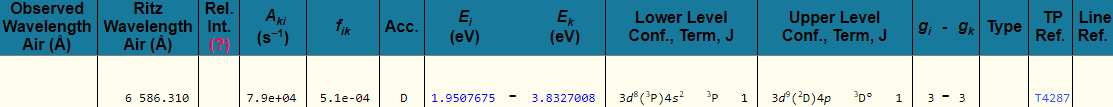

Eq Widths located in saturated part of COG

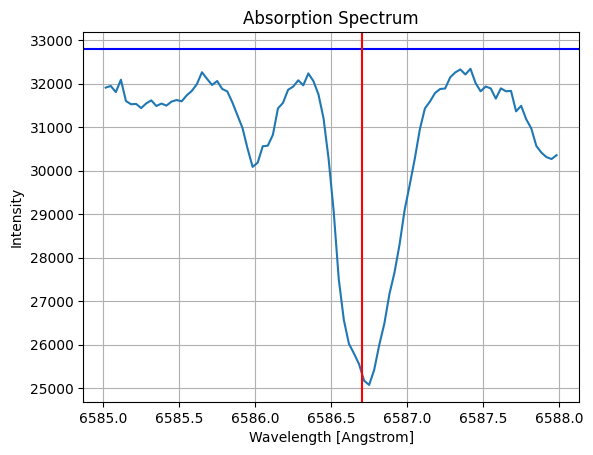

In [27]:
plot_spectrum(dataright, 6585,6588, hor=32800, ver=6586.7
              )

In [28]:
# Step 1: Calculate the equilibrium width of NiI (6586.3)
_, NiI6586_eqwidth = Calc_eqWidth2(data=dataright, start= 6586.3, finish=6587.4, cIntensity=32900)
print("NiI6586_eqwidth: ", NiI6586_eqwidth)

# Step 2: Calculate the vertical position in COG of 
yNiI6586 = vertPos_COG(NiI6586_eqwidth, 6586.3)
print("yNiI6586: ", yNiI6586)

#So, looking at the COW graph, we find:
x = 12.8

NNiI6586_LowerState = NAtoms_LowerState(f=5.1e-04, x=x, wavelength=6586.3)
print("Number of atoms of NiI6586 in Lower State: ", NNiI6586_LowerState)

NNiI6586 = NNiI6586_LowerState*(1 + AtomsRatioStates(gb=3,ga=3,Eb=3.8327, Ea=1.9507))
print("Number of atoms of NiI6586: ", NNiI6586)

NNi_Total = NNiI6586*(1 + AtomsRatioIonized(chi=7.6398, z1=32.29, z2=12.05) + AtomsRatioIonized(chi=7.6398, z1=32.29, z2=12.05) * AtomsRatioIonized(chi=18.16884, z1=12.05, z2=17.16) )
print("Number of atoms of Ni: ", NNi_Total)

NiAbundance = AtomAbundance(NNi_Total)
print("Ni Abundance: ", NiAbundance)

NiI6586_eqwidth:  0.11766717325377789
yNiI6586:  -4.747986188126347
Number of atoms of NiI6586 in Lower State:  9392005099119818.0
Number of atoms of NiI6586:  9608698972327502.0
Number of atoms of Ni:  1.4827812007218122e+17
Ni Abundance:  5.352191656643651


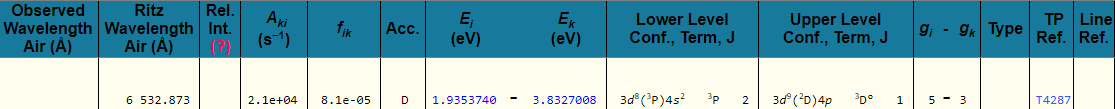

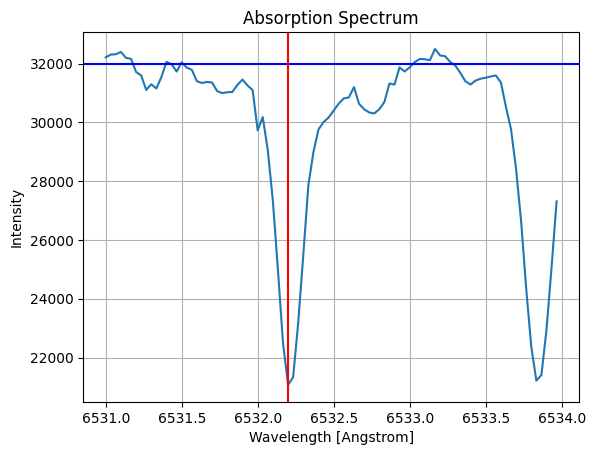

In [49]:
plot_spectrum(dataleft, 6531,6534, hor=32000, ver=6532.2
              )

In [51]:
# Step 1: Calculate the equilibrium width of NiI (6532.8)
_, NiI6532_eqwidth = Calc_eqWidth2(data=dataleft, start= 6531.5, finish=6533.0, cIntensity=32000)
print("NiI6532_eqwidth: ", NiI6532_eqwidth)

# Step 2: Calculate the vertical position in COG of 
yNiI6532 = vertPos_COG(NiI6532_eqwidth, 6532.8)
print("yNiI6586: ", yNiI6532)

#So, looking at the COW graph, we find:
x = 12.7

NNiI6532_LowerState = NAtoms_LowerState(f=8.1e-05, x=x, wavelength=6532.8)
print("Number of atoms of NiI6532 in Lower State: ", NNiI6532_LowerState)

NNiI6532 = NNiI6532_LowerState*(1 + AtomsRatioStates(gb=3,ga=5,Eb=3.8327, Ea=1.935))
print("Number of atoms of NiI6532: ", NNiI6532)

NNi_Total = NNiI6532*(1 + AtomsRatioIonized(chi=7.6398, z1=32.29, z2=12.05) + AtomsRatioIonized(chi=7.6398, z1=32.29, z2=12.05) * AtomsRatioIonized(chi=18.16884, z1=12.05, z2=17.16) )
print("Number of atoms of Ni: ", NNi_Total)

NiAbundance = AtomAbundance(NNi_Total)
print("Ni Abundance: ", NiAbundance)

NiI6532_eqwidth:  0.10940000000139298
yNiI6586:  -4.7760820405759805
Number of atoms of NiI6532 in Lower State:  4.735715704941078e+16
Number of atoms of NiI6532:  4.799244374300113e+16
Number of atoms of Ni:  7.40602797150421e+17
Ni Abundance:  6.050699933390409


## Silicon I 

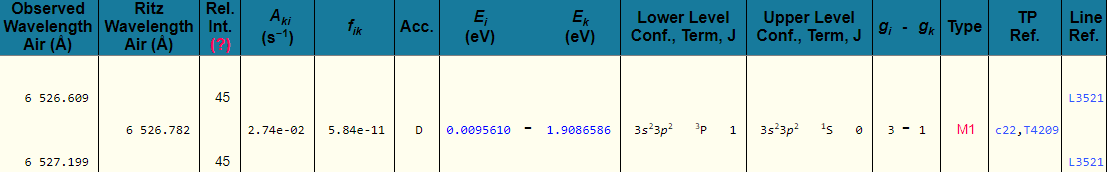

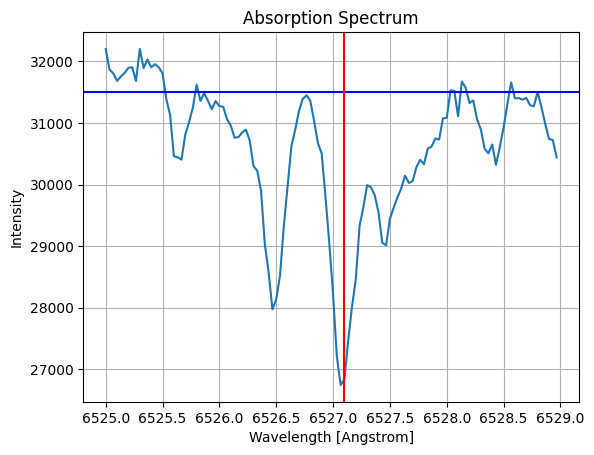

In [55]:
plot_spectrum(dataleft, 6525,6529, hor=31500, ver=6527.1
              )

In [32]:
# Step 1: Calculate the equilibrium width of SiI (6526.6)
_, SiI6526_eqwidth = Calc_eqWidth2(data=dataleft, start= 6526.1, finish=6526.8, cIntensity=31500)
print("SiI6526_eqwidth: ", SiI6526_eqwidth)

# Step 2: Calculate the vertical position in COG of 
ySiI6526 = vertPos_COG(SiI6526_eqwidth, 6526.6)
print("ySiI6526: ", ySiI6526)

#So, looking at the COW graph, we find:
x = 11.2

NSiI6526_LowerState = NAtoms_LowerState(f=5.84e-11, x=x, wavelength=6526.6)
print("Number of atoms of SiI6526 in Lower State: ", NSiI6526_LowerState)

NSiI6526 = NSiI6526_LowerState*(1 + AtomsRatioStates(gb=1,ga=3,Eb=1.90865, Ea=0.00956))
print("Number of atoms of SiI6526: ", NSiI6526)

NSi_Total = NSiI6526*(1 + AtomsRatioIonized(chi=8.15168, z1=9.75, z2=5.73) + AtomsRatioIonized(chi=8.15168, z1=9.75, z2=5.73) * AtomsRatioIonized(chi=16.34584, z1=5.73, z2=1.00) )
print("Number of atoms of Si: ", NSi_Total)

SiAbundance = AtomAbundance(NSi_Total)
print("Si Abundance: ", SiAbundance)

SiI6526_eqwidth:  0.030460846561234423
ySiI6526:  -5.330945027636117
Number of atoms of SiI6526 in Lower State:  2.0790750208906795e+21
Number of atoms of SiI6526:  2.094526597798605e+21
Number of atoms of Si:  1.9171620098654377e+22
Si Abundance:  10.463773399910345


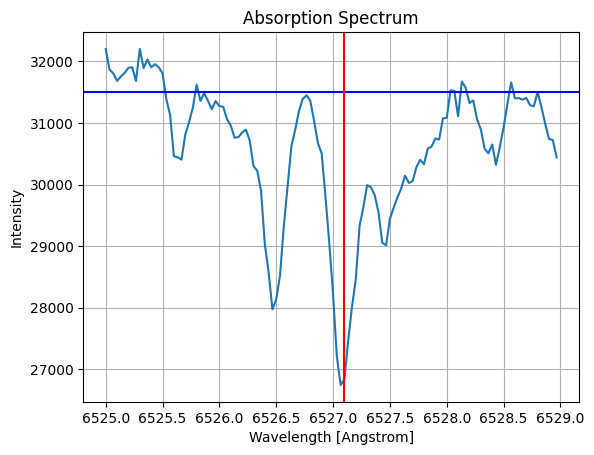

In [65]:
plot_spectrum(dataleft, 6525,6529, hor=31500, ver=6527.1
              )

In [63]:
# Step 1: Calculate the equilibrium width of SiI (6527.2)
_, SiI6527_eqwidth = Calc_eqWidth2(data=dataleft, start= 6526.7, finish=6527.7, cIntensity=31500)
print("SiI6526_eqwidth: ", SiI6527_eqwidth)

# Step 2: Calculate the vertical position in COG of 
ySiI6527 = vertPos_COG(SiI6527_eqwidth, 6527.2)
print("ySiI6527: ", ySiI6527)

#So, looking at the COW graph, we find:
x = 11.6

NSiI6527_LowerState = NAtoms_LowerState(f=5.84e-11, x=x, wavelength=6527.2)
print("Number of atoms of SiI6527 in Lower State: ", NSiI6527_LowerState)

NSiI6527 = NSiI6527_LowerState*(1 + AtomsRatioStates(gb=1,ga=3,Eb=1.90865, Ea=0.00956))
print("Number of atoms of SiI6527: ", NSiI6527)

NSi_Total = NSiI6527*(1 + AtomsRatioIonized(chi=8.15168, z1=9.75, z2=5.73) + AtomsRatioIonized(chi=8.15168, z1=9.75, z2=5.73) * AtomsRatioIonized(chi=16.34584, z1=5.73, z2=1.00) )
print("Number of atoms of Si: ", NSi_Total)

SiAbundance = AtomAbundance(NSi_Total)
print("Si Abundance: ", SiAbundance)

SiI6526_eqwidth:  0.06283544973624983
ySiI6527:  -5.016522192289228
Number of atoms of SiI6527 in Lower State:  5.221920276204277e+21
Number of atoms of SiI6527:  5.26072931481235e+21
Number of atoms of Si:  4.81525056647356e+22
Si Abundance:  10.86373347641078


## Titanium I
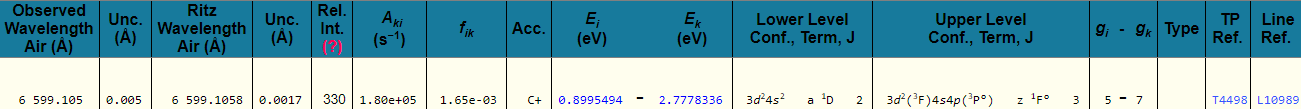

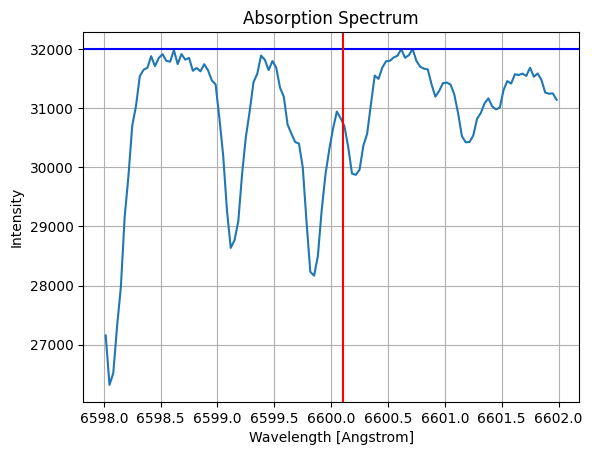

In [35]:
plot_spectrum(dataright, 6598,6602, hor=32000, ver=6600.1
              )

In [66]:
# Step 1: Calculate the equilibrium width of TiI (6599.1)
_, TiI6599_eqwidth = Calc_eqWidth2(data=dataright, start= 6599.4, finish=6600.1, cIntensity=32000)
print("TiI6599_eqwidth: ", TiI6599_eqwidth)

# Step 2: Calculate the vertical position in COG of 
yTiI6599 = vertPos_COG(TiI6599_eqwidth, 6599.1)
print("yTiI6599: ", yTiI6599)

#So, looking at the COW graph, we find:
x = 11.3

NTiI6599_LowerState = NAtoms_LowerState(f=1.65e-03, x=x, wavelength=6599.1)
print("Number of atoms of TiI6599 in Lower State: ", NTiI6599_LowerState)

NTiI6599 = NTiI6599_LowerState*(1 + AtomsRatioStates(gb=7,ga=5,Eb=2.777, Ea=0.88995))
print("Number of atoms of TiI6599: ", NTiI6599)

NTi_Total = NTiI6599*(1 + AtomsRatioIonized(chi=6.82812, z1=34.66, z2=59.92) + AtomsRatioIonized(chi=6.82812, z1=34.66, z2=59.92) * AtomsRatioIonized(chi=13.5755, z1=59.92, z2=21.30) )
print("Number of atoms of Ti: ", NTi_Total)

TiAbundance = AtomAbundance(NTi_Total)
print("Ti Abundance: ", TiAbundance)

TiI6599_eqwidth:  0.035232812500448615
yTiI6599:  -5.2725373968990565
Number of atoms of TiI6599 in Lower State:  91622333944017.52
Number of atoms of TiI6599:  94552048765328.58
Number of atoms of Ti:  3.2218521635731812e+16
Ti Abundance:  4.689220194109487


## Hydrogen I
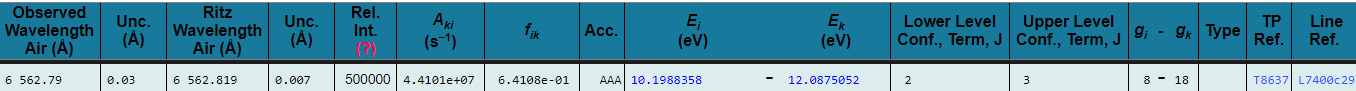

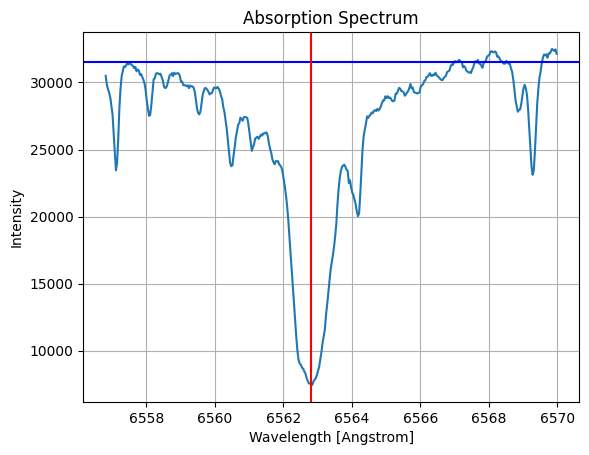

In [87]:
plot_spectrum(dataright, 6550,6570, hor=31500, ver=6562.8
              )

In [83]:
_, HI6562_eqWidth = Calc_eqWidth2(data=dataright, start=6559, finish=6567,cIntensity=31500)
print("HI6562 eqWidth = ",HI6562_eqWidth)

HI6562 eqWidth =  1.7616555555779865


##  Lines Comparison

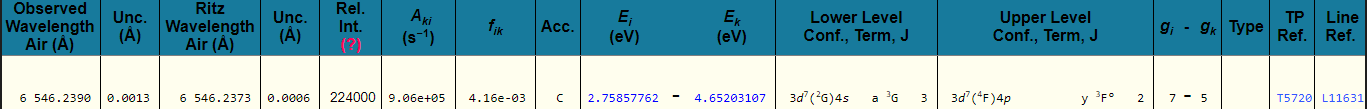

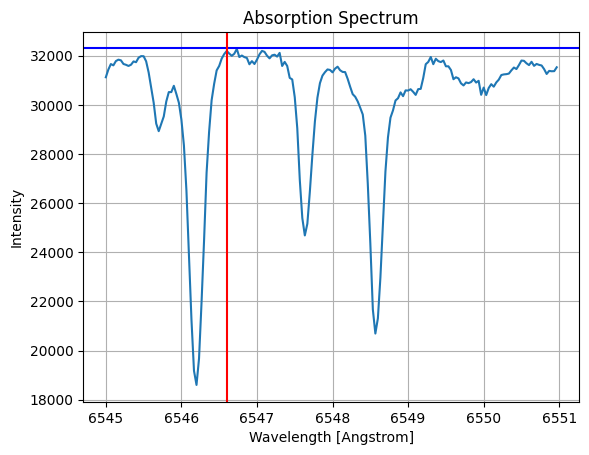

In [97]:
plot_spectrum(dataleft, 6545,6551, ver=6546.6, hor=32300
              )

In [100]:
_, FeI6546_eqWidth = Calc_eqWidth2(data=dataleft, start= 6545.8, finish=6546.6, cIntensity=32300)
print("FeI6546 equivalent width is: ",FeI6546_eqWidth)

print("Ratios are", AtomsRatioIonized(z1=23.50, z2=37.32, chi=7.9024) , AtomsRatioIonized(z1=23.50, z2=37.32, chi=7.9024) * AtomsRatioIonized(z1=37.32, z2=21.35, chi=7.9024))

FeI6546 equivalent width is:  0.11774303405722676
Ratios are 36.2968245813529 474.59126058642875
